In [16]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from collections import Counter
import statistics as stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.model_selection import learning_curve


In [17]:
data = pd.read_csv("fetal_health.csv")
data.head().T

,0,1,2,3,4
baseline value,120.0,132.000,133.000,134.000,132.000
accelerations,0.0,0.006,0.003,0.003,0.007
fetal_movement,0.0,0.000,0.000,0.000,0.000
uterine_contractions,0.0,0.006,0.008,0.008,0.008
light_decelerations,0.0,0.003,0.003,0.003,0.000
severe_decelerations,0.0,0.000,0.000,0.000,0.000
prolongued_decelerations,0.0,0.000,0.000,0.000,0.000
abnormal_short_term_variability,73.0,17.000,16.000,16.000,16.000
mean_value_of_short_term_variability,0.5,2.100,2.100,2.400,2.400
percentage_of_time_with_abnormal_long_term_variability,43.0,0.000,0.000,0.000,0.000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [20]:
data.shape

(2126, 22)

In [21]:
print(f"Dataset Columns:\n{data.columns}")

Dataset Columns:
Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')


In [22]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [23]:
data.isnull()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2122,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2123,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2124,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
df = data.copy(deep=True)
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [25]:
df['fetal_health'] = df['fetal_health'].replace({
        1.0: "NORMAL",
        2.0: "SUSPECT",
        3.0: "PATHOLOGICAL"
    })

df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,SUSPECT
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,NORMAL
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,NORMAL
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,NORMAL
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,NORMAL


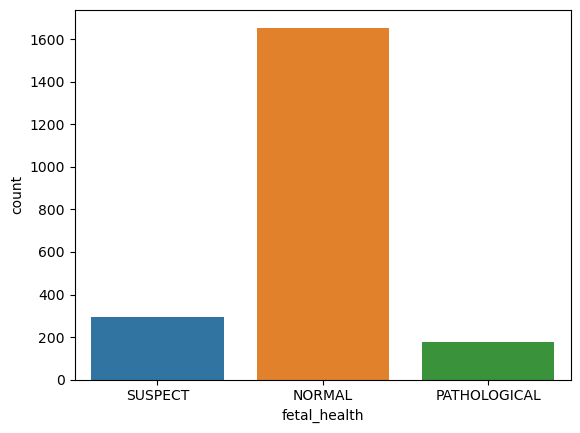

In [26]:
sns.countplot(x=df['fetal_health'])
plt.show()

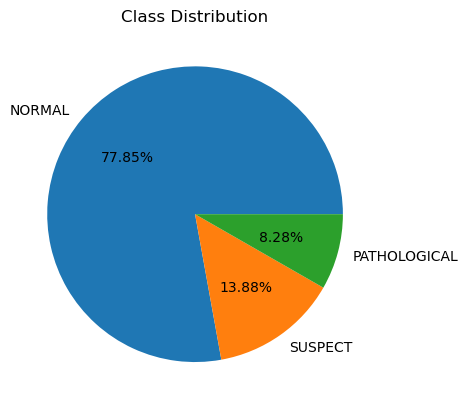

In [27]:
plt.pie(
    df['fetal_health'].value_counts(),
    autopct='%.2f%%',
    labels=['NORMAL','SUSPECT','PATHOLOGICAL']
)

plt.title("Class Distribution")
plt.show()

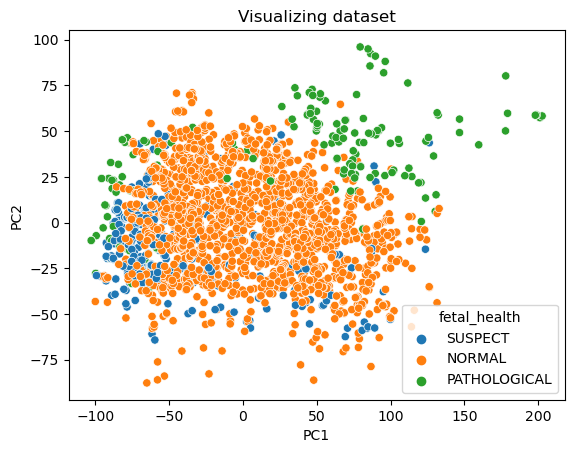

In [28]:

# visualizing dataset using PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(df.iloc[:,:-1])
sns.scatterplot(x=x_pca[:,0],y=x_pca[:,1],hue=df.iloc[:,-1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Visualizing dataset")
plt.show()

In [ ]:
def preprocess(data):
    df = data.copy(deep=True)
    
    # X and y split and dropping 2 features
    df = df.drop(['histogram_mode','histogram_median'],axis=1)
    X = df.drop('fetal_health',axis=1)
    y = df['fetal_health']
    
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    # standard scaling
    sc = StandardScaler()
    sc.fit(X_train)
    X_train = pd.DataFrame(sc.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(sc.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [52]:
X_train, X_test, y_train, y_test = preprocess(df)


In [53]:

X_train.shape

(1700, 19)

In [54]:
 X_test

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mean,histogram_variance,histogram_tendency
282,-0.012861,-0.309366,0.002740,-0.479710,0.043451,-0.064301,-0.268148,-0.048467,-0.262589,-0.532648,1.249296,-0.039314,0.056483,0.008034,0.325555,-0.445313,0.032698,-0.338667,-0.516697
1999,-0.818907,-0.824976,-0.183561,1.558208,2.085854,-0.064301,-0.268148,0.878607,0.421201,-0.532648,-1.254776,0.037536,-0.852550,-1.340946,0.325555,-0.445313,-1.175713,0.352324,1.119029
1709,-0.214373,0.206244,-0.142161,-0.140057,1.064653,-0.064301,1.383487,0.762723,0.877061,-0.532648,-1.289798,0.498640,-0.515871,0.232864,1.346042,-0.445313,-0.476106,0.075928,-0.516697
988,-0.214373,2.010878,-0.204261,0.199596,-0.637350,-0.064301,-0.268148,-1.033483,-0.034659,-0.532648,-0.659402,0.473023,-0.381200,0.401487,1.346042,-0.445313,0.668704,-0.338667,1.119029
2018,-0.818907,-0.824976,-0.204261,1.218555,1.745453,-0.064301,1.383487,0.994492,-0.034659,-0.532648,-0.992111,0.165621,-0.515871,-0.497833,-0.014607,-0.445313,-1.493715,-0.407766,-0.516697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,1.196208,-0.824976,0.230441,-1.498669,-0.637350,-0.064301,-0.268148,1.573913,-1.174309,1.123455,0.041038,-0.423567,1.268527,1.188392,-0.694931,-0.445313,0.605103,-0.615063,-2.152424
973,-0.214373,-0.824976,-0.204261,0.199596,2.085854,-0.064301,-0.268148,-0.859657,0.535166,-0.201428,-1.044644,0.677958,-1.155561,-0.441626,-0.354769,0.999405,-0.921310,1.768856,1.119029
611,1.095452,0.721854,-0.100761,-0.819363,-0.637350,-0.064301,-0.268148,-0.801715,0.421201,-0.532648,2.317467,0.831659,-0.751547,0.570110,0.325555,0.999405,0.923106,-0.304117,1.119029
2108,0.289406,-0.824976,-0.142161,1.218555,-0.296949,-0.064301,-0.268148,1.168318,0.991026,-0.532648,-0.676913,-0.654119,0.224822,-1.059909,-0.354769,-0.445313,-0.221704,-0.580514,1.119029


In [34]:
 y_train.shape

(1700,)

In [35]:
 y_test.shape


(426,)

In [36]:
class bs_mode:
    
    def __init__(self):
        self.mode = None
    
    def fit(self,X,y):
        self.mode = stats.mode(y)
        
    def predict(self,X):
        y_pred = [self.mode for i in range(X.shape[0])]
        return np.array(y_pred)

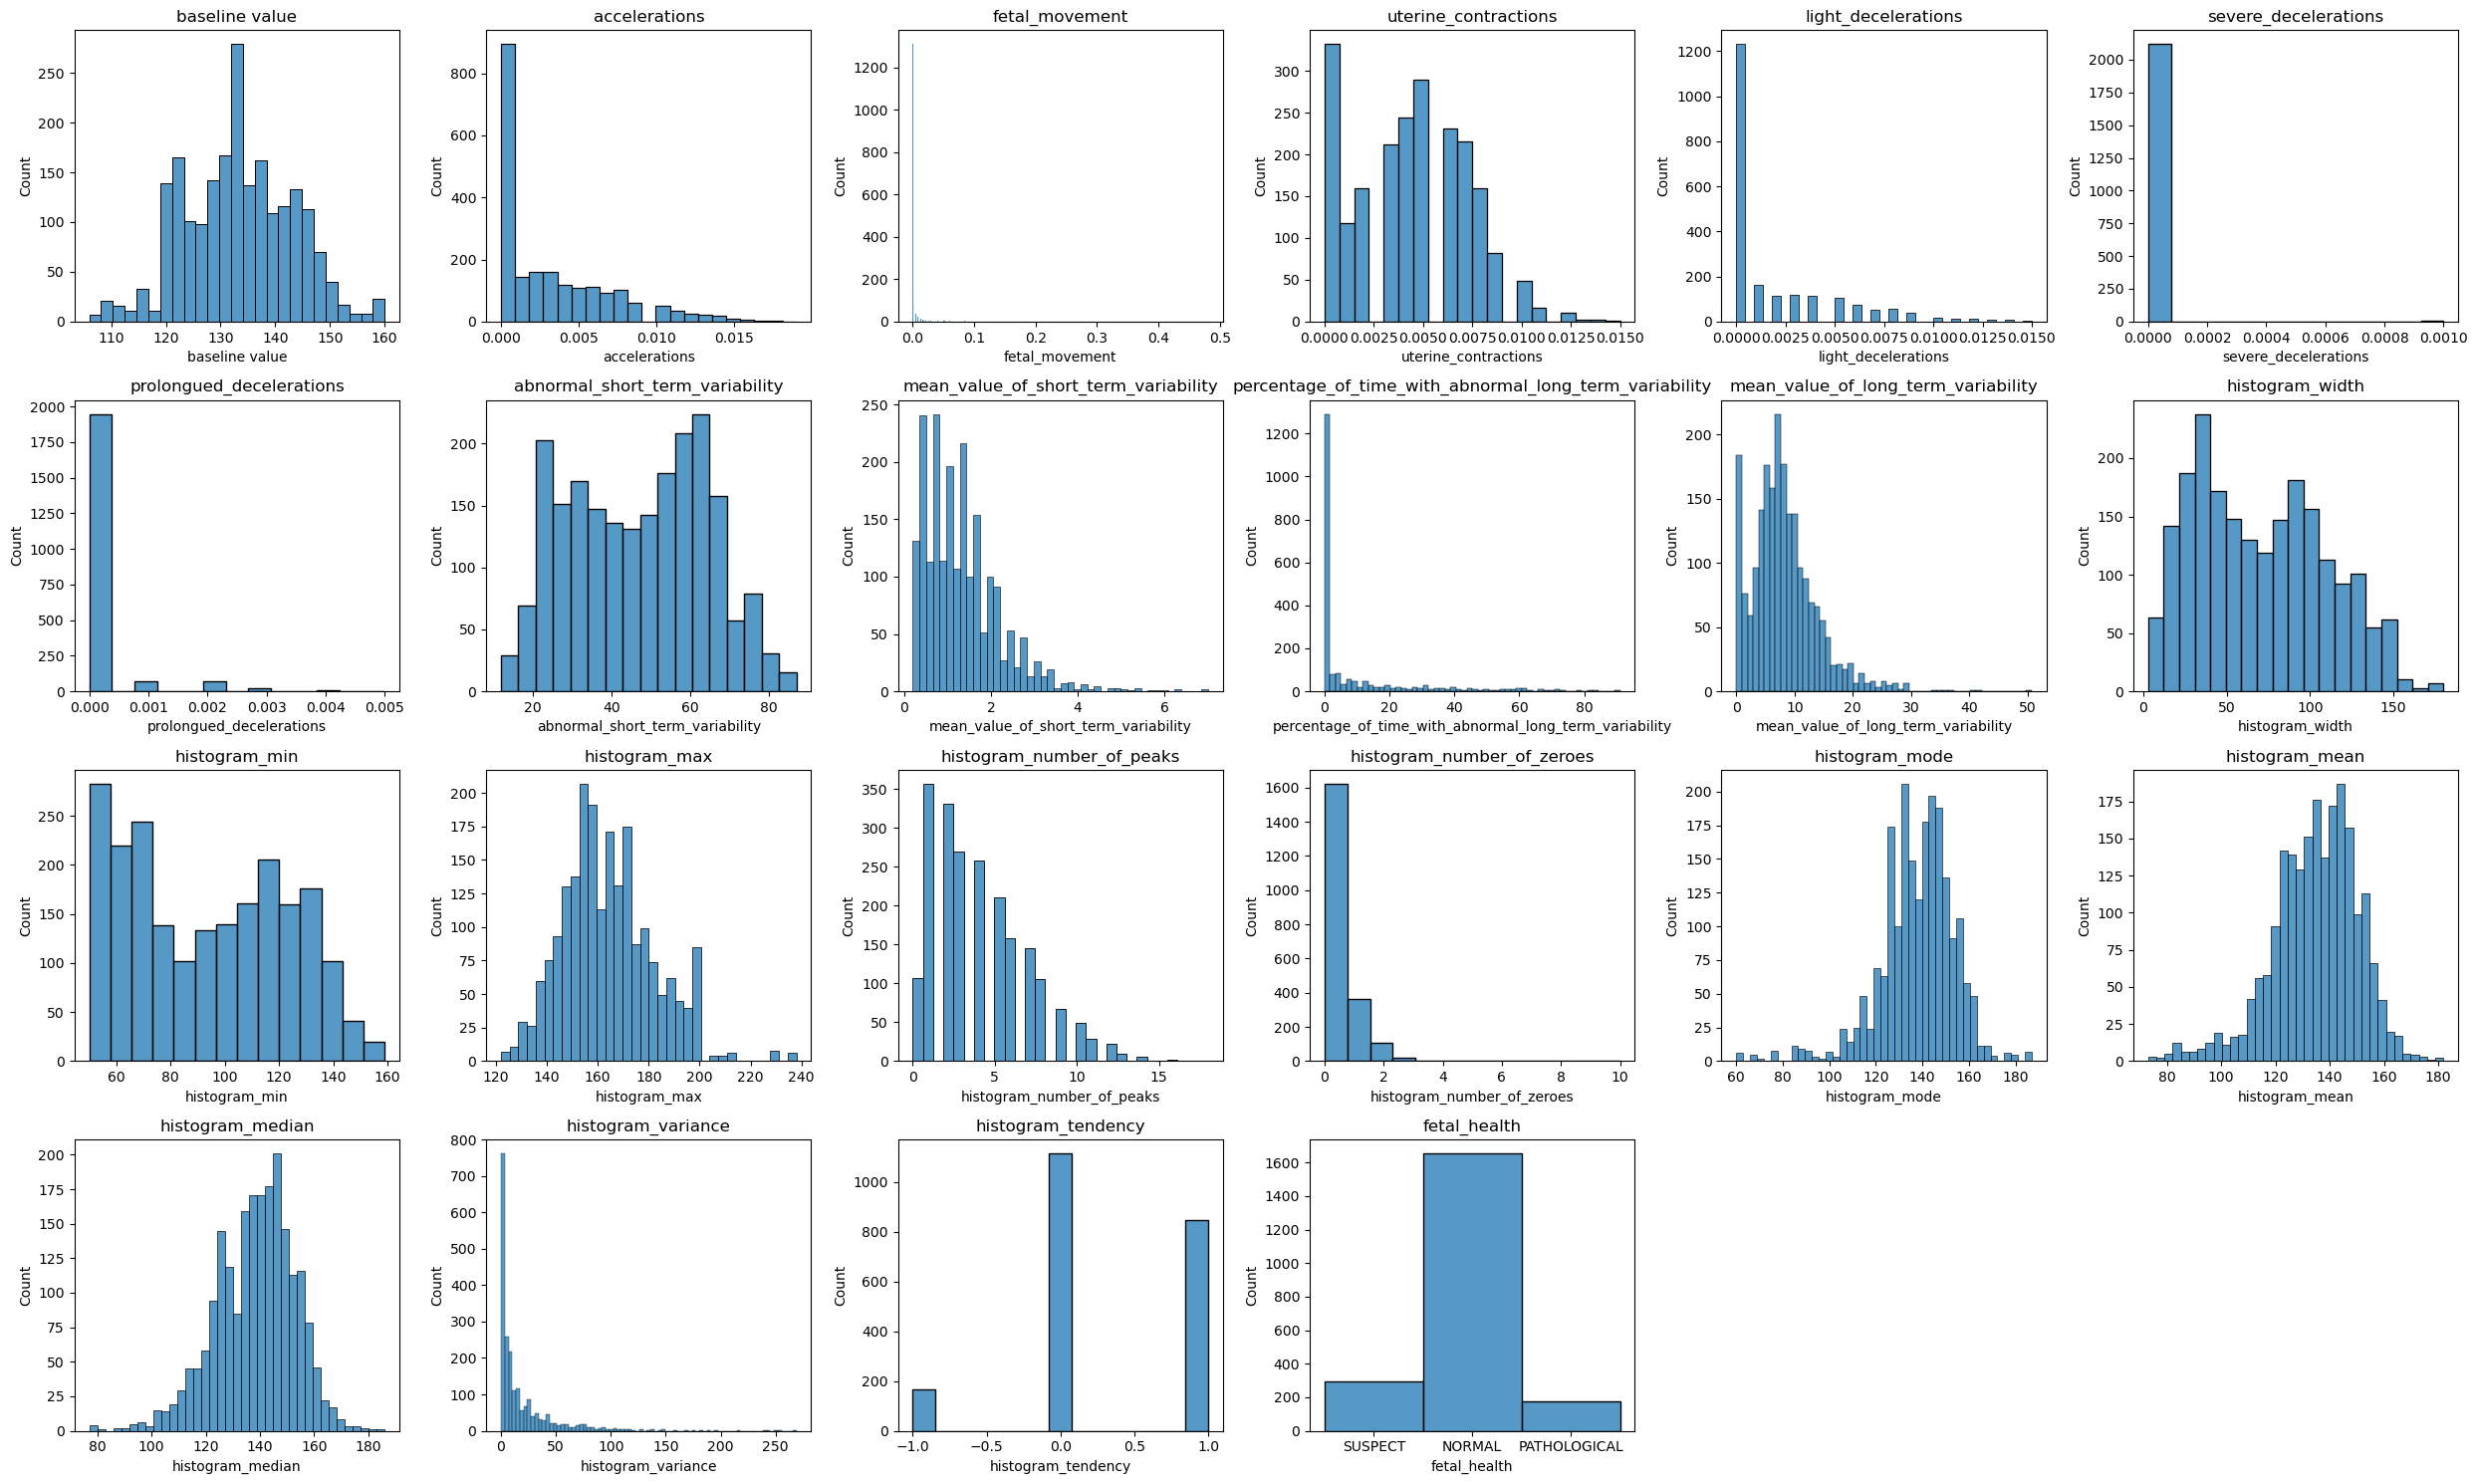

In [56]:
plt.figure(figsize=(25, 15))

for i, col in enumerate(df.columns):
    plt.subplot(4, 6, i+1)
    sns.histplot(data = df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [57]:
def recall_cal(y_true,y_pred):
    recall_df = pd.DataFrame(zip(['NORMAL','SUSPECT','PATHOLOGICAL'],
                                 recall_score(y_true,y_pred,average=None)),
                             columns=['Class','Recall Score'])
    recall_df.loc[len(recall_df)] = ['MACRO RECALL',recall_score(y_true,y_pred,average='macro')] 
    return recall_df

In [59]:
m1 = bs_mode()
m1.fit(X_train,y_train)
y_pred_train_mode = m1.predict(X_train)
y_pred_test_mode = m1.predict(X_test)
print("TRAINING SET RESULTS")
print("MODEL: Mode")
print("-"*30)
print(recall_cal(y_train,y_pred_train_mode).to_string(index=False))
print("TESTING SET RESULTS")
print("MODEL: Mode")
print("-"*30)
print(recall_cal(y_test,y_pred_test_mode).to_string(index=False))
recall_train_m1 = recall_cal(y_train, y_pred_train_mode)
recall_test_m1 = recall_cal(y_test, y_pred_test_mode)

TRAINING SET RESULTS
MODEL: Mode
------------------------------
       Class  Recall Score
      NORMAL      1.000000
     SUSPECT      0.000000
PATHOLOGICAL      0.000000
MACRO RECALL      0.333333
TESTING SET RESULTS
MODEL: Mode
------------------------------
       Class  Recall Score
      NORMAL      1.000000
     SUSPECT      0.000000
PATHOLOGICAL      0.000000
MACRO RECALL      0.333333


In [60]:
m2 = LogisticRegression()
m2.fit(X_train,y_train)
y_pred_train_lr = m2.predict(X_train)
y_pred_test_lr = m2.predict(X_test)
print("TRAINING SET RESULTS")
print("MODEL: Logistic Regression with default params")
print("-"*50)
print(recall_cal(y_train,y_pred_train_lr).to_string(index=False))
print("TESTING SET RESULTS")
print("MODEL: Logistic Regression with default params")
print("-"*50)
print(recall_cal(y_test,y_pred_test_lr).to_string(index=False))
recall_train_m2 = recall_cal(y_train, y_pred_train_lr)
recall_test_m2 = recall_cal(y_test, y_pred_test_lr)




TRAINING SET RESULTS
MODEL: Logistic Regression with default params
--------------------------------------------------
       Class  Recall Score
      NORMAL      0.959909
     SUSPECT      0.816327
PATHOLOGICAL      0.683983
MACRO RECALL      0.820073
TESTING SET RESULTS
MODEL: Logistic Regression with default params
--------------------------------------------------
       Class  Recall Score
      NORMAL      0.927928
     SUSPECT      0.689655
PATHOLOGICAL      0.656250
MACRO RECALL      0.757944


In [61]:
m3 = SVC(class_weight='balanced',decision_function_shape='ovo',kernel='rbf')
m3.fit(X_train,y_train)
y_pred_train_3 = m3.predict(X_train)
y_pred_test_3 = m3.predict(X_test)
print("TRAINING SET RESULTS")
print("MODEL: SVC with class_weight='balanced' and OVO (kernel:rbf)")
print("-"*50)
print(recall_cal(y_train,y_pred_train_3).to_string(index=False))
print("TESTING SET RESULTS")
print("MODEL: MODEL: SVC with class_weight='balanced' and OVO (kernel:rbf)")
print("-"*50)
print(recall_cal(y_test,y_pred_test_3).to_string(index=False))

recall_train_m3 = recall_cal(y_train, y_pred_train_3)
recall_test_m3 = recall_cal(y_test, y_pred_test_3)



TRAINING SET RESULTS
MODEL: SVC with class_weight='balanced' and OVO (kernel:rbf)
--------------------------------------------------
       Class  Recall Score
      NORMAL      0.892587
     SUSPECT      0.938776
PATHOLOGICAL      0.956710
MACRO RECALL      0.929357
TESTING SET RESULTS
MODEL: MODEL: SVC with class_weight='balanced' and OVO (kernel:rbf)
--------------------------------------------------
       Class  Recall Score
      NORMAL      0.870871
     SUSPECT      0.896552
PATHOLOGICAL      0.890625
MACRO RECALL      0.886016


In [42]:
m4 = DecisionTreeClassifier(random_state=28,max_depth=7,min_samples_split=10)
m4.fit(X_train,y_train)
y_pred_train_4 = m4.predict(X_train)
y_pred_test_4 = m4.predict(X_test)
print("TRAINING SET RESULTS")
print("MODEL: DT with max_depth=7,min_samples_split=10")
print("-"*50)
print(recall_cal(y_train,y_pred_train_4).to_string(index=False))
print("TESTING SET RESULTS")
print("MODEL: DT with max_depth=7,min_samples_split=10")
print("-"*50)
print(recall_cal(y_test,y_pred_test_4).to_string(index=False))

recall_train_m4 = recall_cal(y_train, y_pred_train_4)
recall_test_m4 = recall_cal(y_test, y_pred_test_4)



TRAINING SET RESULTS
MODEL: DT with max_depth=7,min_samples_split=10
--------------------------------------------------
       Class  Recall Score
      NORMAL      0.977307
     SUSPECT      0.931973
PATHOLOGICAL      0.878788
MACRO RECALL      0.929356
TESTING SET RESULTS
MODEL: DT with max_depth=7,min_samples_split=10
--------------------------------------------------
       Class  Recall Score
      NORMAL      0.942943
     SUSPECT      0.931034
PATHOLOGICAL      0.843750
MACRO RECALL      0.905909


In [43]:
m5 = KNeighborsClassifier(n_neighbors=5,weights='distance')
m5.fit(X_train,y_train)
y_pred_train_5 = m5.predict(X_train)
y_pred_test_5 = m5.predict(X_test)
m4 = KNeighborsClassifier(n_neighbors=5,weights='distance')
m4.fit(X_train,y_train)
y_pred_train_5 = m5.predict(X_train)
y_pred_test_5 = m5.predict(X_test)
print("TRAINING SET RESULTS")
print("MODEL: kNN (k=5, weights='distance')")
print("-"*50)
print(recall_cal(y_train,y_pred_train_5).to_string(index=False))
print("TESTING SET RESULTS")
print("MODEL: kNN (k=5, weights='distance')")
print("-"*50)
print(recall_cal(y_test,y_pred_test_5).to_string(index=False))

recall_train_m5 = recall_cal(y_train, y_pred_train_5)
recall_test_m5 = recall_cal(y_test, y_pred_test_5)


TRAINING SET RESULTS
MODEL: kNN (k=5, weights='distance')
--------------------------------------------------
       Class  Recall Score
      NORMAL           1.0
     SUSPECT           1.0
PATHOLOGICAL           1.0
MACRO RECALL           1.0
TESTING SET RESULTS
MODEL: kNN (k=5, weights='distance')
--------------------------------------------------
       Class  Recall Score
      NORMAL      0.966967
     SUSPECT      0.862069
PATHOLOGICAL      0.734375
MACRO RECALL      0.854470


In [44]:
m6 = RandomForestClassifier(random_state=28,n_estimators=65,class_weight='balanced',criterion='gini',min_samples_leaf=15)
m6.fit(X_train,y_train)
y_pred_train_6 = m6.predict(X_train)
y_pred_test_6 = m6.predict(X_test)
print("TRAINING SET RESULTS")
print("MODEL: Random Forest Classifier (n_estimators=65,class_weight='balanced',criterion='gini',min_samples_leaf=15)")
print("-"*50)
print(recall_cal(y_train,y_pred_train_6).to_string(index=False))
print("TESTING SET RESULTS")
print("MODEL: Random Forest Classifier (n_estimators=65,class_weight='balanced',criterion='gini',min_samples_leaf=15)")
print("-"*50)
print(recall_cal(y_test,y_pred_test_6).to_string(index=False))


recall_train_m6 = recall_cal(y_train, y_pred_train_6)
recall_test_m6 = recall_cal(y_test, y_pred_test_6)


TRAINING SET RESULTS
MODEL: Random Forest Classifier (n_estimators=65,class_weight='balanced',criterion='gini',min_samples_leaf=15)
--------------------------------------------------
       Class  Recall Score
      NORMAL      0.919062
     SUSPECT      0.965986
PATHOLOGICAL      0.930736
MACRO RECALL      0.938595
TESTING SET RESULTS
MODEL: Random Forest Classifier (n_estimators=65,class_weight='balanced',criterion='gini',min_samples_leaf=15)
--------------------------------------------------
       Class  Recall Score
      NORMAL      0.894895
     SUSPECT      0.965517
PATHOLOGICAL      0.890625
MACRO RECALL      0.917012


In [45]:
m_nb = GaussianNB()
m_nb.fit(X_train, y_train)

# Predictions
y_pred_train_nb = m_nb.predict(X_train)
y_pred_test_nb = m_nb.predict(X_test)

# Print results
print("TRAINING SET RESULTS")
print("MODEL: Gaussian Naive Bayes")
print("-" * 50)
print(recall_cal(y_train, y_pred_train_nb).to_string(index=False))
print("\nTESTING SET RESULTS")
print("MODEL: Gaussian Naive Bayes")
print("-" * 50)
print(recall_cal(y_test, y_pred_test_nb).to_string(index=False))
recall_train_nb = recall_cal(y_train, y_pred_train_nb)
recall_test_nb = recall_cal(y_test, y_pred_test_nb)


TRAINING SET RESULTS
MODEL: Gaussian Naive Bayes
--------------------------------------------------
       Class  Recall Score
      NORMAL      0.667171
     SUSPECT      0.619048
PATHOLOGICAL      0.948052
MACRO RECALL      0.744757

TESTING SET RESULTS
MODEL: Gaussian Naive Bayes
--------------------------------------------------
       Class  Recall Score
      NORMAL      0.636637
     SUSPECT      0.517241
PATHOLOGICAL      0.937500
MACRO RECALL      0.697126


In [46]:
from sklearn.metrics import accuracy_score

# Assuming you have computed predictions and true labels for each model
# y_pred_train_mode, y_pred_test_mode, y_train, y_test, etc.


# Calculate and print accuracy for Logistic Regression
accuracy_lr_train = accuracy_score(y_train, y_pred_train_lr)
accuracy_lr_test = accuracy_score(y_test, y_pred_test_lr)
print("Logistic Regression Model Accuracy (Training):", accuracy_lr_train)
print("Logistic Regression Model Accuracy (Testing):", accuracy_lr_test)

# Calculate and print accuracy for SVC
accuracy_svc_train = accuracy_score(y_train, y_pred_train_5)
accuracy_svc_test = accuracy_score(y_test, y_pred_test_5)
print("SVC Model Accuracy (Training):", accuracy_svc_train)
print("SVC Model Accuracy (Testing):", accuracy_svc_test)

# Calculate and print accuracy for Decision Tree
accuracy_dt_train = accuracy_score(y_train, y_pred_train_3)
accuracy_dt_test = accuracy_score(y_test, y_pred_test_3)
print("Decision Tree Model Accuracy (Training):", accuracy_dt_train)
print("Decision Tree Model Accuracy (Testing):", accuracy_dt_test)

# Calculate and print accuracy for kNN
accuracy_knn_train = accuracy_score(y_train, y_pred_train_4)
accuracy_knn_test = accuracy_score(y_test, y_pred_test_4)
print("kNN Model Accuracy (Training):", accuracy_knn_train)
print("kNN Model Accuracy (Testing):", accuracy_knn_test)

# Calculate and print accuracy for Random Forest
accuracy_rf_train = accuracy_score(y_train, y_pred_train_5)
accuracy_rf_test = accuracy_score(y_test, y_pred_test_5)
print("Random Forest Model Accuracy (Training):", accuracy_rf_train)
print("Random Forest Model Accuracy (Testing):", accuracy_rf_test)



Logistic Regression Model Accuracy (Training): 0.91
Logistic Regression Model Accuracy (Testing): 0.8708920187793427
SVC Model Accuracy (Training): 1.0
SVC Model Accuracy (Testing): 0.9248826291079812
Decision Tree Model Accuracy (Training): 0.9052941176470588
Decision Tree Model Accuracy (Testing): 0.8755868544600939
kNN Model Accuracy (Training): 0.96
kNN Model Accuracy (Testing): 0.9272300469483568
Random Forest Model Accuracy (Training): 1.0
Random Forest Model Accuracy (Testing): 0.9248826291079812


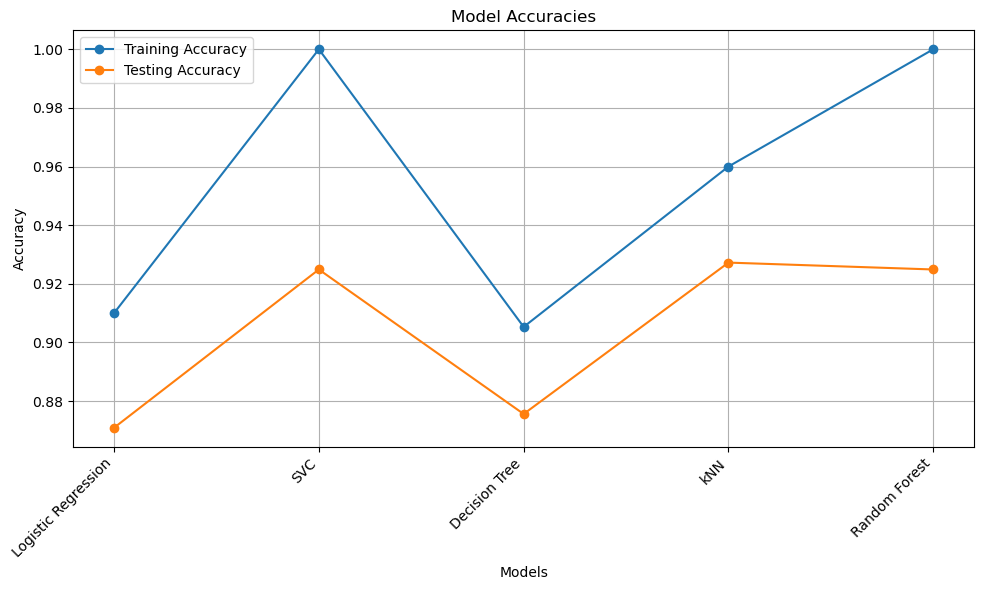

In [47]:
import matplotlib.pyplot as plt

# Define model names and their corresponding accuracies
models = ['Logistic Regression', 'SVC', 'Decision Tree', 'kNN', 'Random Forest']
train_accuracies = [ accuracy_lr_train, accuracy_svc_train, accuracy_dt_train, accuracy_knn_train, accuracy_rf_train]
test_accuracies = [ accuracy_lr_test, accuracy_svc_test, accuracy_dt_test, accuracy_knn_test, accuracy_rf_test]

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(models, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(models, test_accuracies, marker='o', label='Testing Accuracy')
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


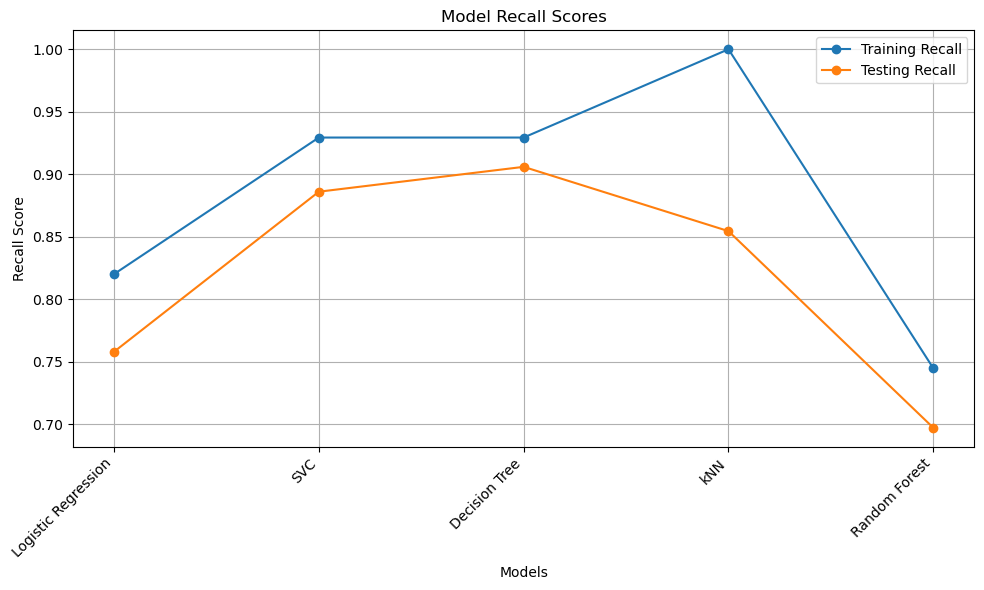

In [48]:

import matplotlib.pyplot as plt

# Define algorithms and their corresponding recall scores
Models = [ 'Logistic Regression', 'SVC', 'Decision Tree', 'kNN', 'Random Forest']
recall_train_scores = [recall_train_m2['Recall Score'][3], recall_train_m3['Recall Score'][3], 
                       recall_train_m4['Recall Score'][3], recall_train_m5['Recall Score'][3], recall_train_nb['Recall Score'][3]]
recall_test_scores = [ recall_test_m2['Recall Score'][3], recall_test_m3['Recall Score'][3], 
                      recall_test_m4['Recall Score'][3], recall_test_m5['Recall Score'][3], recall_test_nb['Recall Score'][3]]

# Plotting recall scores
plt.figure(figsize=(10, 6))

plt.plot(Models, recall_train_scores, marker='o', label='Training Recall')
plt.plot(Models, recall_test_scores, marker='o', label='Testing Recall')

plt.title('Model Recall Scores')
plt.xlabel('Models')
plt.ylabel('Recall Score')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [49]:
from sklearn.metrics import precision_score

def precision_cal(y_true, y_pred):
    precision_df = pd.DataFrame(zip(['NORMAL', 'SUSPECT', 'PATHOLOGICAL'],
                                    precision_score(y_true, y_pred, average=None)),
                                columns=['Class', 'Precision Score'])
    precision_df.loc[len(precision_df)] = ['MACRO PRECISION', precision_score(y_true, y_pred, average='macro')]
    return precision_df

# Assuming you have already trained and obtained predictions for various models


precision_train_m2 = precision_cal(y_train, y_pred_train_lr)
precision_test_m2 = precision_cal(y_test, y_pred_test_lr)

precision_train_m3 = precision_cal(y_train, y_pred_train_5)
precision_test_m3 = precision_cal(y_test, y_pred_test_5)

precision_train_m4 = precision_cal(y_train, y_pred_train_3)
precision_test_m4 = precision_cal(y_test, y_pred_test_3)

precision_train_m5 = precision_cal(y_train, y_pred_train_4)
precision_test_m5 = precision_cal(y_test, y_pred_test_4)

precision_train_m6 = precision_cal(y_train, y_pred_train_5)
precision_test_m6 = precision_cal(y_test, y_pred_test_5)



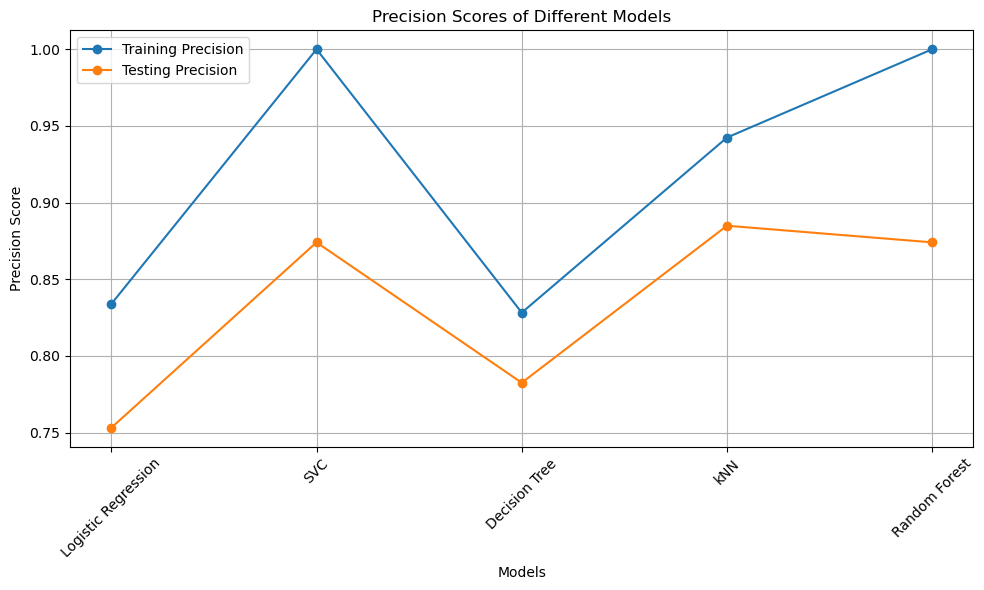

In [50]:
import matplotlib.pyplot as plt

# Define the models and their precision scores
models =  ['Logistic Regression', 'SVC', 'Decision Tree', 'kNN', 'Random Forest',]
precision_train = [
                   precision_train_m2['Precision Score'].iloc[-1], 
                   precision_train_m3['Precision Score'].iloc[-1], 
                   precision_train_m4['Precision Score'].iloc[-1], 
                   precision_train_m5['Precision Score'].iloc[-1], 
                   precision_train_m6['Precision Score'].iloc[-1]]
precision_test = [ 
                  precision_test_m2['Precision Score'].iloc[-1], 
                  precision_test_m3['Precision Score'].iloc[-1], 
                  precision_test_m4['Precision Score'].iloc[-1], 
                  precision_test_m5['Precision Score'].iloc[-1], 
                  precision_test_m6['Precision Score'].iloc[-1]]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(models, precision_train, marker='o', label='Training Precision')
plt.plot(models, precision_test, marker='o', label='Testing Precision')
plt.title('Precision Scores of Different Models')
plt.xlabel('Models')
plt.ylabel('Precision Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
